In [13]:
# Import necessary packages
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

In [2]:
# Set start and end date
start_date = "2015-01-01"
end_date = "2023-09-01"

In [3]:
# Read in economic data from FRED
consumer_confidence = web.DataReader("UMCSENT", "fred", start_date, end_date)
savings_rate = web.DataReader("PSAVERT", "fred", start_date, end_date)

In [4]:
# Merging datasets
data = pd.concat([consumer_confidence, savings_rate], axis=1)
data.columns = ['Consumer Confidence', 'Savings Rate']


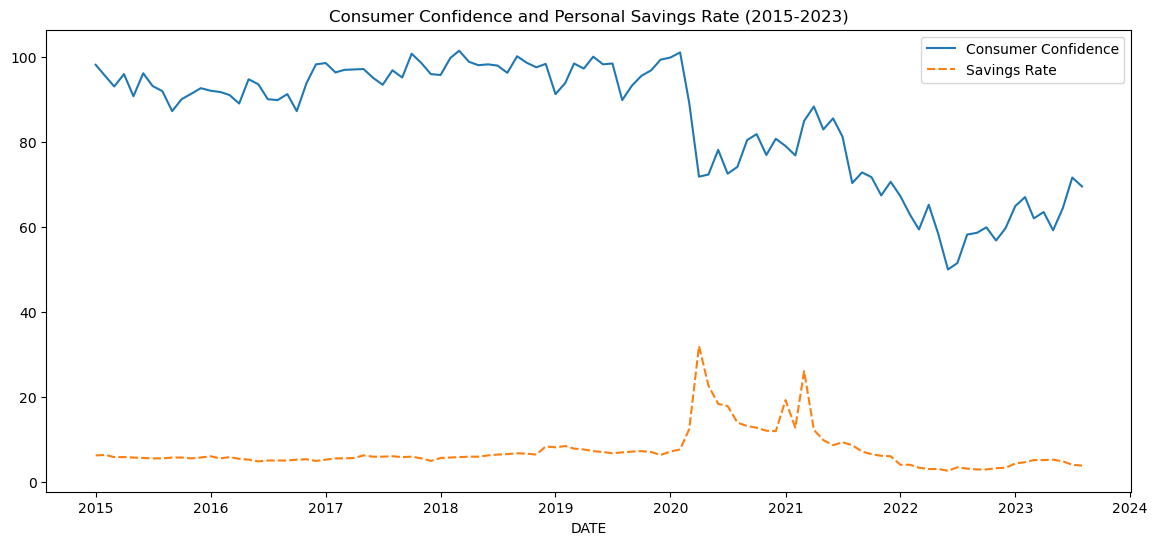

In [5]:
# Basic plotting
plt.figure(figsize=(14, 6))
sns.lineplot(data=data)
plt.title('Consumer Confidence and Personal Savings Rate (''2015-2023)')
plt.show()

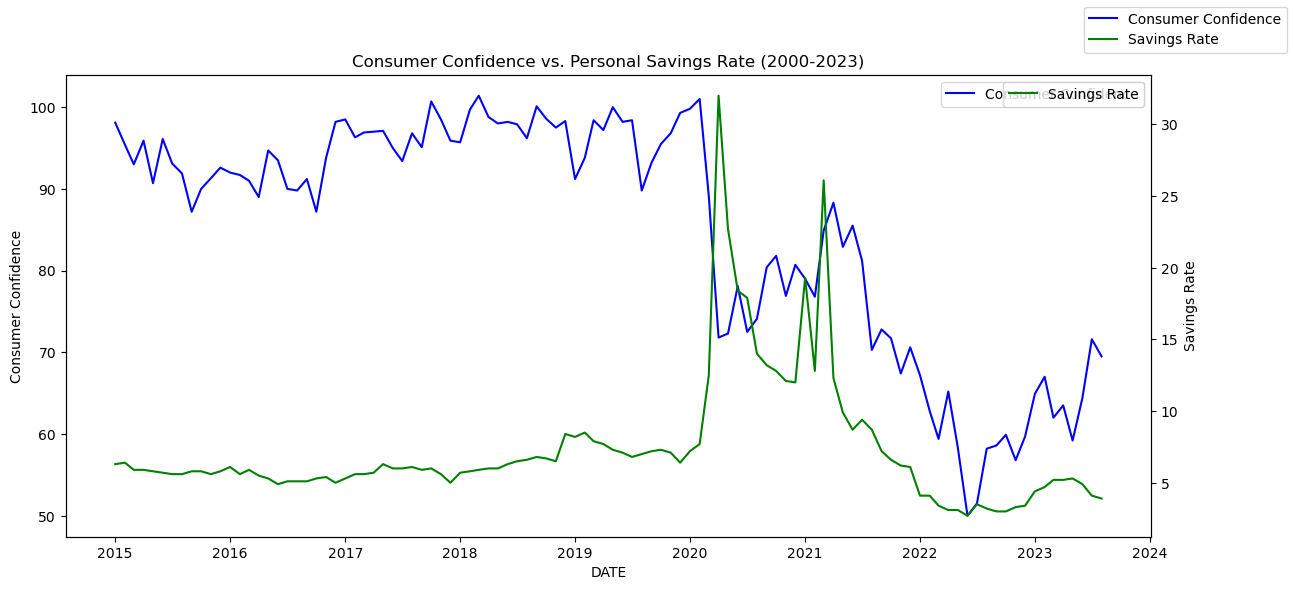

In [6]:
# Dual axis plot for scaling
plt.figure(figsize=(14, 6))
ax = sns.lineplot(data=data['Consumer Confidence'], color='blue', label='Consumer Confidence')
ax2 = ax.twinx()
sns.lineplot(data=data['Savings Rate'], color='green', ax=ax2, label='Savings Rate')
ax.figure.legend()
plt.title('Consumer Confidence vs. Personal Savings Rate (2000-2023)')
plt.show()

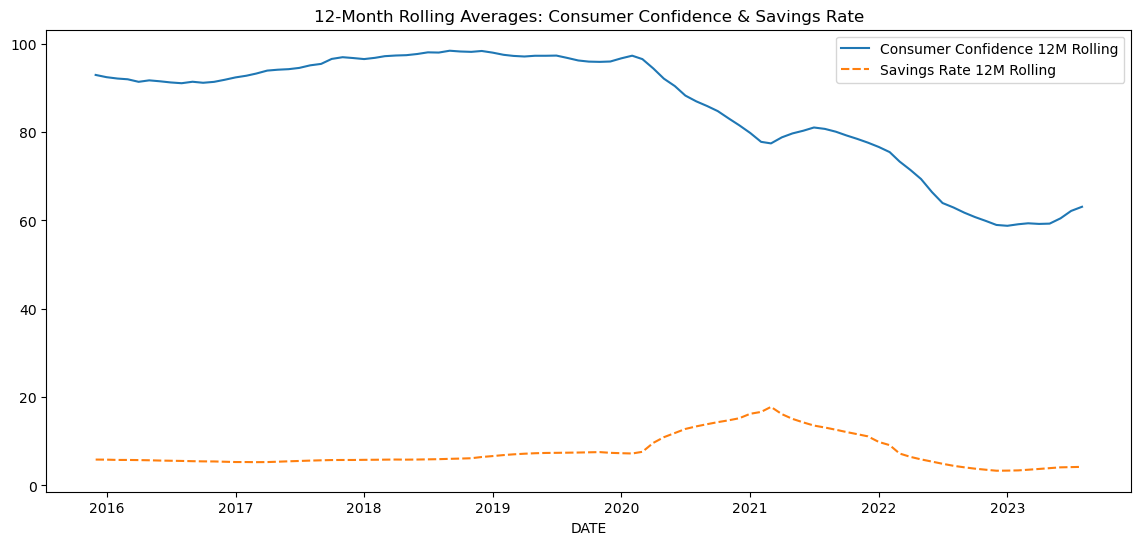

In [8]:
# Rolling average plot
data['Consumer Confidence 12M Rolling'] = data['Consumer Confidence'].rolling(window=12).mean()
data['Savings Rate 12M Rolling'] = data['Savings Rate'].rolling(window=12).mean()

plt.figure(figsize=(14, 6))
sns.lineplot(data=data[['Consumer Confidence 12M Rolling', 'Savings Rate 12M Rolling']])
plt.title('12-Month Rolling Averages: Consumer Confidence & Savings Rate')
plt.show()

In [10]:
# Interactive plots using plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['Consumer Confidence'],
                    mode='lines',
                    name='Consumer Confidence'))
fig.add_trace(go.Scatter(x=data.index, y=data['Savings Rate'],
                    mode='lines',
                    name='Savings Rate', yaxis="y2"))

# Create axis objects
fig.update_layout(
    yaxis=dict(
        title="Consumer Confidence"
    ),
    yaxis2=dict(
        title="Savings Rate",
        overlaying="y",
        side="right"
    ),
    title="Interactive Consumer Confidence vs. Savings Rate"
)

fig.show()

C:\Users\a67wa_lb2dwvq\AppData\Local\Temp\ipykernel_26268\567086968.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\a67wa_lb2dwvq\AppData\Local\Temp\ipykernel_26268\567086968.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




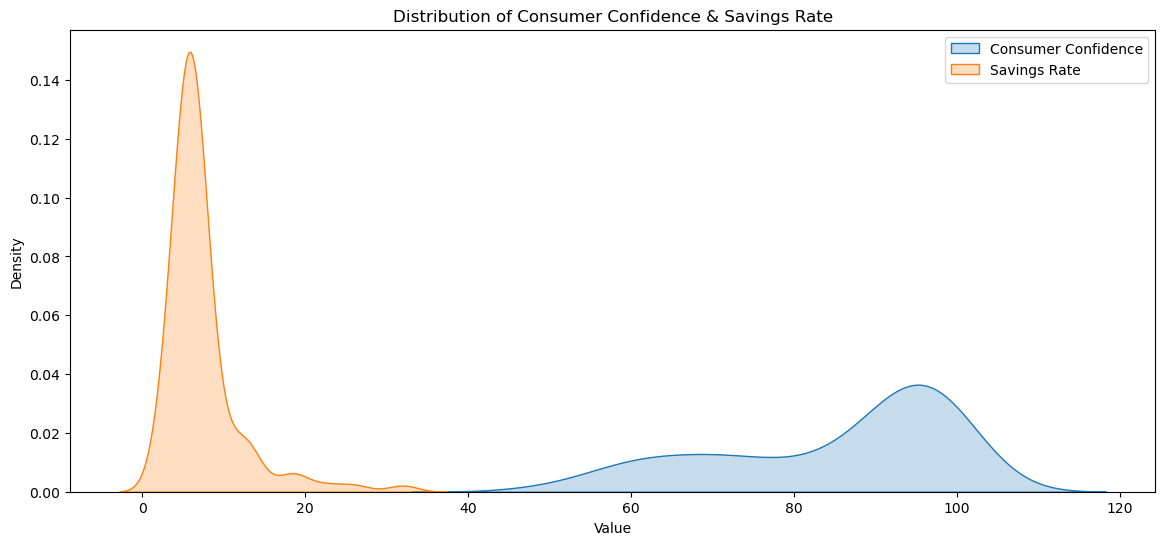

In [11]:
# Simple distrubition chart
plt.figure(figsize=(14, 6))
sns.kdeplot(data['Consumer Confidence'], shade=True, label='Consumer Confidence')
sns.kdeplot(data['Savings Rate'], shade=True, label='Savings Rate')
plt.title('Distribution of Consumer Confidence & Savings Rate')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

<Figure size 1400x600 with 0 Axes>

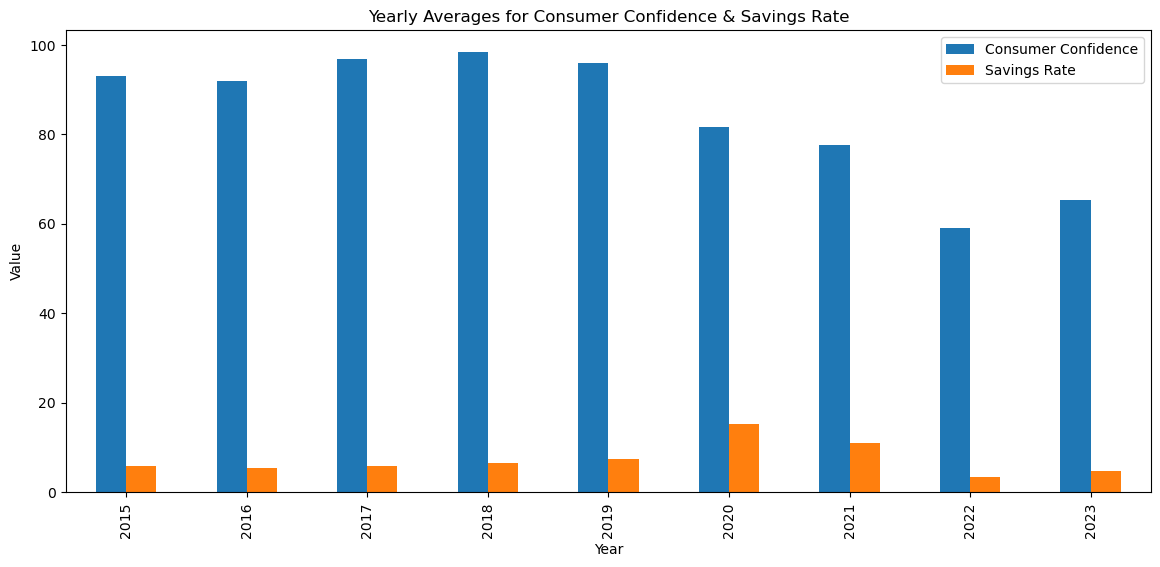

In [12]:
# Averages across time bar chart
data['Year'] = data.index.year
yearly_data = data.groupby('Year').mean()

plt.figure(figsize=(14, 6))
yearly_data[['Consumer Confidence', 'Savings Rate']].plot(kind='bar', figsize=(14,6))
plt.title('Yearly Averages for Consumer Confidence & Savings Rate')
plt.ylabel('Value')
plt.show()

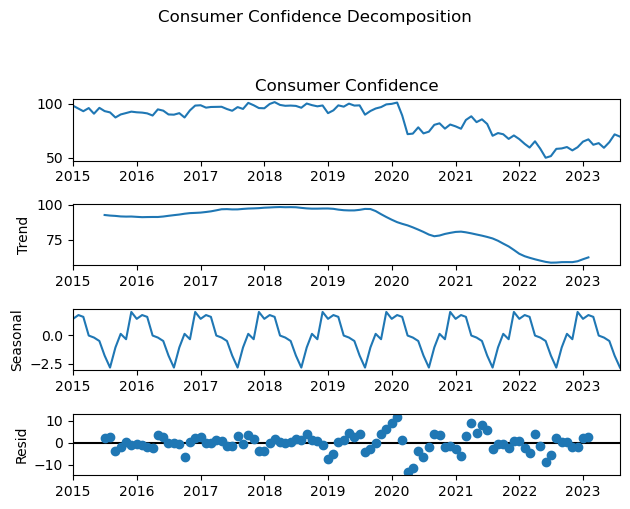

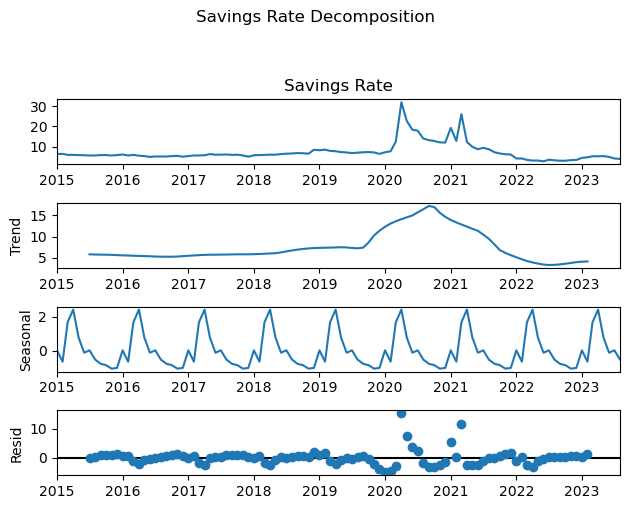

In [16]:
# Decompose data
result_cc = seasonal_decompose(data['Consumer Confidence'].dropna(), model='additive', period=12)

result_cc.plot()
plt.suptitle('Consumer Confidence Decomposition', y=1.05)
plt.tight_layout()
plt.show()

result_sr = seasonal_decompose(data['Savings Rate'].dropna(), model='additive', period=12)

result_sr.plot()
plt.suptitle('Savings Rate Decomposition', y=1.05)
plt.tight_layout()
plt.show()

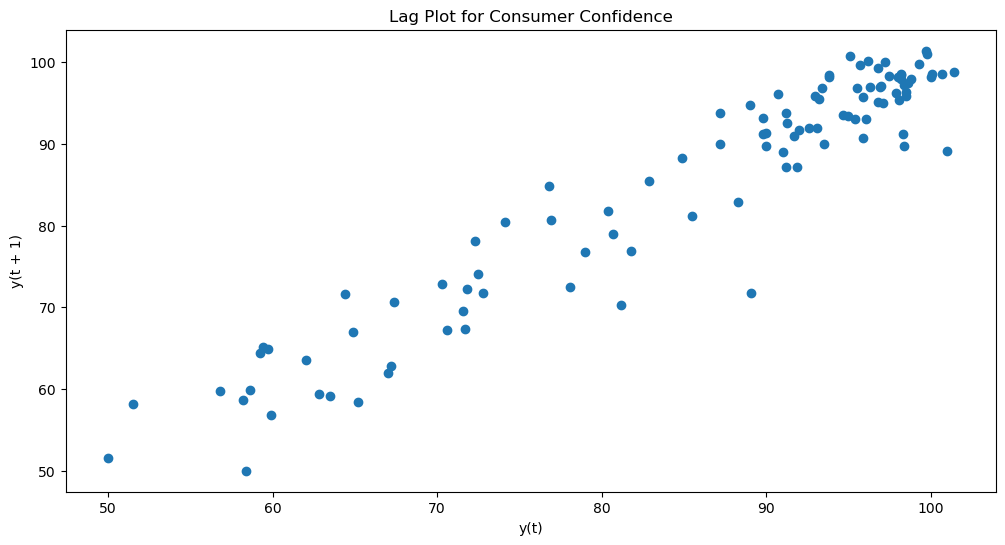

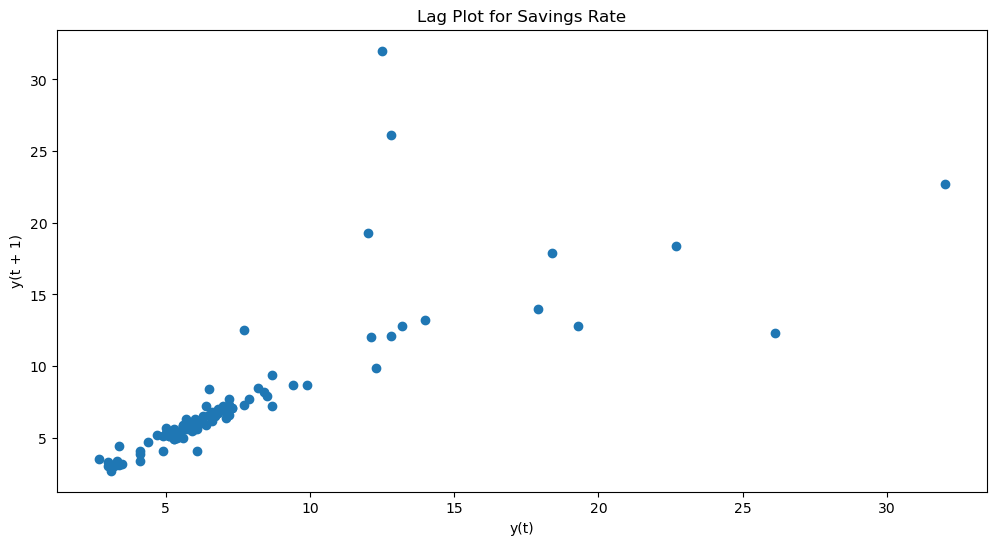

In [17]:
# Lag plots
plt.figure(figsize=(12,6))
lag_plot(data['Consumer Confidence'])
plt.title('Lag Plot for Consumer Confidence')
plt.show()

plt.figure(figsize=(12,6))
lag_plot(data['Savings Rate'])
plt.title('Lag Plot for Savings Rate')
plt.show()


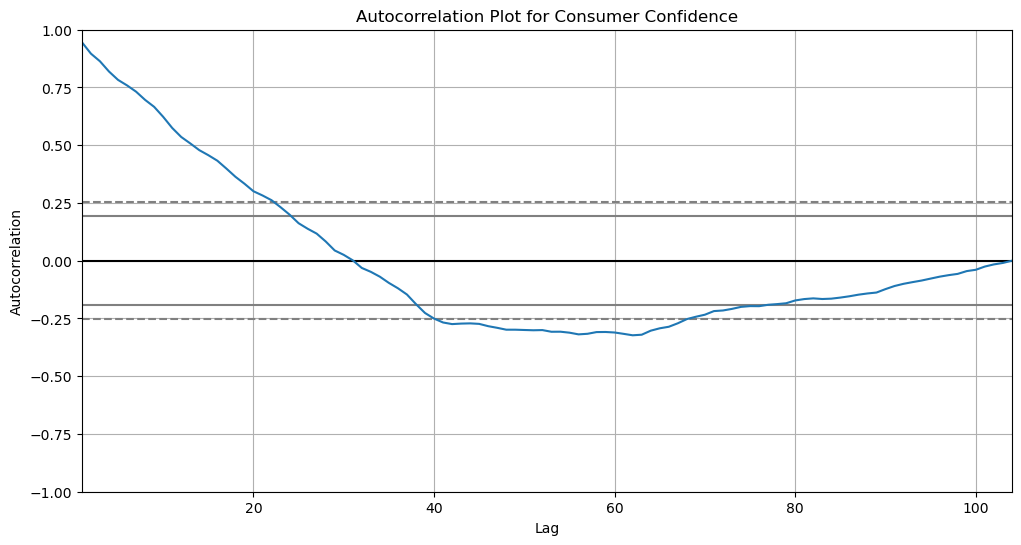

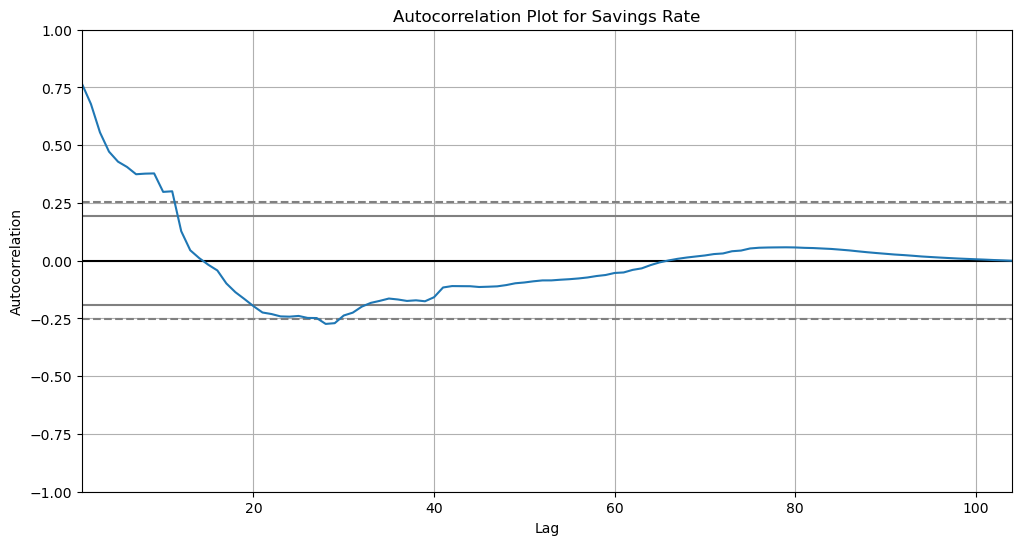

In [18]:
# Autocorrelation plots
plt.figure(figsize=(12,6))
autocorrelation_plot(data['Consumer Confidence'])
plt.title('Autocorrelation Plot for Consumer Confidence')
plt.show()

plt.figure(figsize=(12,6))
autocorrelation_plot(data['Savings Rate'])
plt.title('Autocorrelation Plot for Savings Rate')
plt.show()


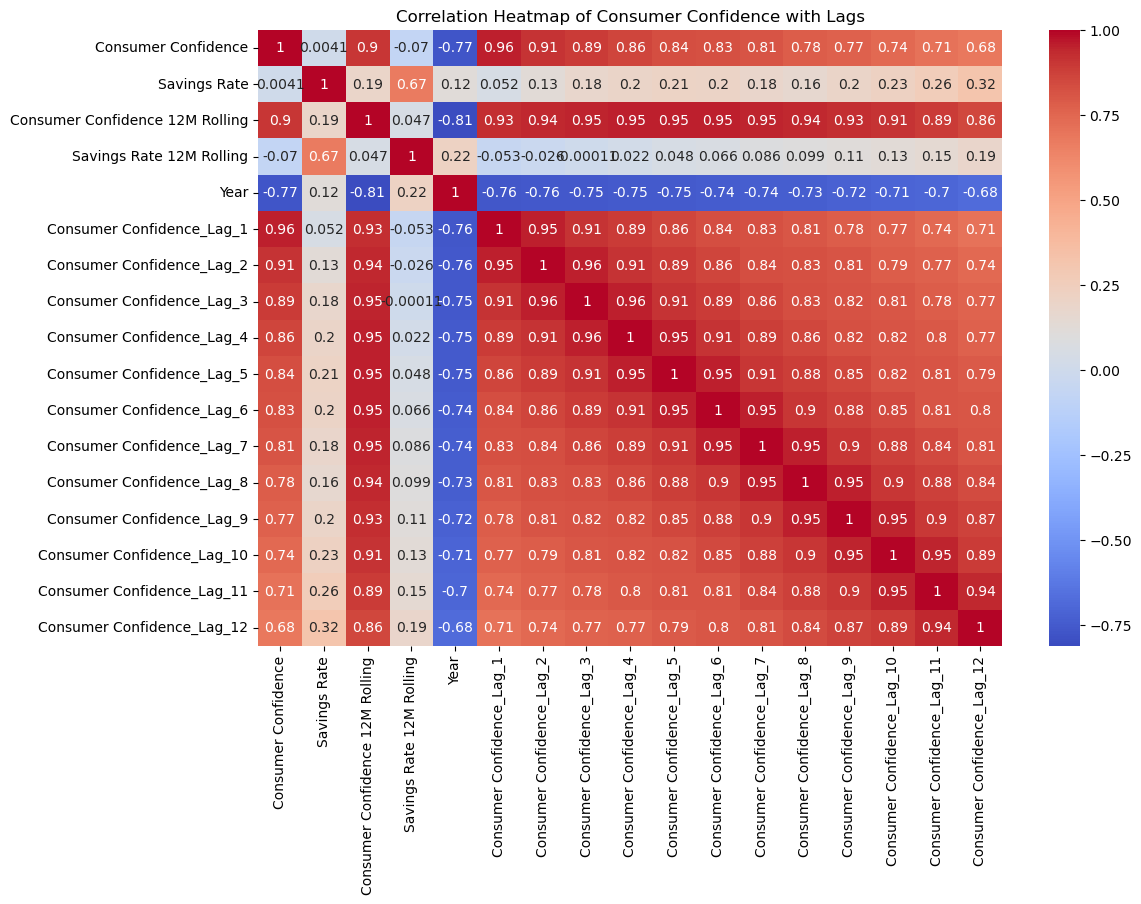

Consumer Confidence: Shows a high positive correlation with its own lags, indicating that past values of consumer confidence are good indicators of the current value. Correlation diminishes as the lag increases, but remains significantly high. Consumer Confidence vs. Savings Rate: Low positive correlation (around 0.19) indicating that as consumer confidence rises, the savings rate might slightly rise as well. However, it's a weak relationship. Consumer Confidence 12M Rolling vs. Year: There's a negative correlation of about -0.77. This suggests that over the years, the rolling average of consumer confidence has been decreasing.Consumer Confidence vs. Savings Rate 12M Rolling:Shows a positive correlation but lower than with the savings rate, which indicates that the rolling average of the savings rate is somewhat positively related to consumer confidence but less so than the actual savings rate.Consumer Confidence Lags vs. Year:All lags of consumer confidence have a strong negative corr

In [26]:
def create_lagged_df(df, column_name, lags):
    lagged_df = df.copy()  # This ensures that df is a DataFrame
    for i in range(1, lags + 1):
        lagged_df[f"{column_name}_Lag_{i}"] = df[column_name].shift(i)
    return lagged_df

lags = 12
consumer_confidence_lagged = create_lagged_df(data, 'Consumer Confidence', lags)
correlation_matrix = consumer_confidence_lagged.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Consumer Confidence with Lags')
plt.show()

findings = "Consumer Confidence: Shows a high positive correlation with its own lags, indicating that past values of consumer confidence are good indicators of the current value. Correlation diminishes as the lag increases, but remains significantly high. Consumer Confidence vs. Savings Rate: Low positive correlation (around 0.19) indicating that as consumer confidence rises, the savings rate might slightly rise as well. However, it's a weak relationship. Consumer Confidence 12M Rolling vs. Year: There's a negative correlation of about -0.77. This suggests that over the years, the rolling average of consumer confidence has been decreasing.Consumer Confidence vs. Savings Rate 12M Rolling:Shows a positive correlation but lower than with the savings rate, which indicates that the rolling average of the savings rate is somewhat positively related to consumer confidence but less so than the actual savings rate.Consumer Confidence Lags vs. Year:All lags of consumer confidence have a strong negative correlation with the year, similar to the Consumer Confidence 12M Rolling vs. Year correlation. This reiterates that consumer confidence might have been trending downwards over the years. Confidence vs. Consumer Confidence 12M Rolling:Very high positive correlation of 0.9, indicating that the current consumer confidence values closely follow its 12-month rolling average.Consumer Confidence Lags:The lags of consumer confidence all show strong positive correlations with the Consumer Confidence 12M Rolling, suggesting that the rolling average is a strong summary measure of past values.Savings Rate vs. Year:Shows a weak positive correlation, indicating that the savings rate might have slightly increased over the years.Consumer Confidence Lags vs. Savings Rate and its Rolling Average:The correlations are generally positive but decrease as the lags increase. This indicates that more recent values of consumer confidence are better indicators of the savings rate.Conclusion:Consumer confidence seems to be a good predictor of itself, with past values indicating future trends.There's a slight positive relationship between consumer confidence and savings rate.The rolling average of consumer confidence has been decreasing over the years, implying a long-term trend in decreasing confidence.The rolling average of consumer confidence is a good summary of its past values, making it useful for understanding overall trends."
print(findings)

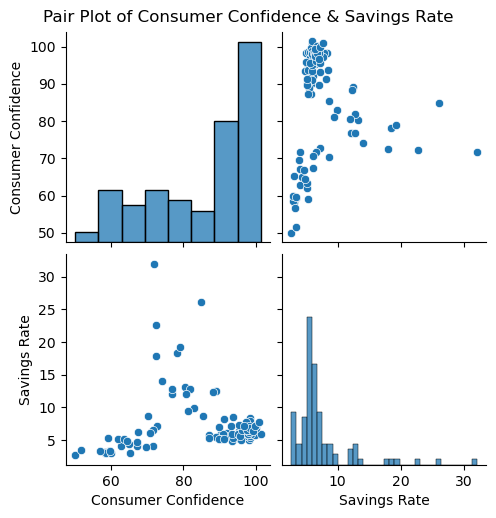

In [20]:
# Pair grid
sns.pairplot(data[["Consumer Confidence", "Savings Rate"]])
plt.suptitle('Pair Plot of Consumer Confidence & Savings Rate', y=1.02)
plt.show()
